# Project 4: Yelp Sentiment Analysis

## Dataset: 

Yelp Reviews Dataset (available from Yelp Dataset Challenge or Kaggle)

## Analysis Goals:

1. Data Understanding:
    - Explore the structure of the dataset, including features like review text, star ratings, and business categories.
        Understand the distribution of star ratings and sentiment labels (e.g., positive, negative) in the dataset.
      
2. Text Preprocessing:
    - Tokenization: Split the tweets into individual words or tokens.
    - Removing stopwords: Eliminate common words that don't carry much sentiment information.
    - Stemming/Lemmatization: Reduce words to their root form to reduce dimensionality.
    - Handle mentions, hashtags, and URLs: Remove or replace mentions, hashtags, and URLs with placeholders.

3. Feature Extraction:
    - Bag-of-Words (BoW): Represent text data as a matrix of word frequencies.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Weigh the importance of words in a document relative to their frequency in the corpus.
    - Word Embeddings: Represent words in a continuous vector space, such as Word2Vec or GloVe embeddings.

4. Model Building:
    - Algorithms: Use algorithms suitable for text classification
        - Naive Bayes
        - Logistic Regression
        - Support Vector Machines
        - Neural network-based models like LSTM or CNN.
    - Train/Test Split: Split the data into training and testing sets, typically using an 80/20 or 70/30 split.
   - Model evaluation:
       - Accuracy
       - Precision
       - Recall
       - F1-score
       - ROC-AUC
5. Hyperparameter Tuning:
    - Use techniques like GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for each model.
    - Perform cross-validation with k-fold to ensure robustness of parameter selection.

6. Model Evaluation:
    - Evaluate the trained models using metrics such as accuracy, precision, recall, and F1-score.
    - Use techniques like k-fold cross-validation to assess the generalization performance of the models.
    - Visualize model performance using confusion matrices and ROC curves.

7. Analysis of Results:
    - Examine misclassified examples: Analyze misclassified tweets to understand common errors made by the model.
    - Interpret feature importance: If using models like Logistic Regression or linear SVM, analyze feature coefficients or weights to understand which words contribute most to sentiment classification.
    - Optionally, analyze sentiment trends across different business categories or locations within the dataset.

## Analysis

### Load Data

| Field Name  | Description                                                                    |
|-------------|--------------------------------------------------------------------------------|
| review_id   | 22 character unique review id                                                   |
| user_id     | 22 character unique user id, maps to the user in user.json                      |
| business_id | 22 character business id, maps to business in business.json                     |
| stars       | Star rating (integer)                                                           |
| date        | Date formatted YYYY-MM-DD                                                       |
| text        | The review itself (string)                                                      |
| useful      | Number of useful votes received (integer)                                        |
| funny       | Number of funny votes received (integer)                                         |
| cool        | Number of cool votes received (integer)                                          |


In [1]:
import pandas as pd
df = pd.read_csv('data/Yelp_Review_Data.csv',nrows=1000)
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


### Data Preprocessing

In [2]:
import numpy as np

# Drop columns we don't need
df = df.drop(columns = ['Unnamed: 0', 'review_id', 'user_id', 'business_id','date'], axis=1)
df.head()

,stars,useful,funny,cool,text
0,3,0,0,0,"If you decide to eat here, just be aware it is..."
1,5,1,0,1,I've taken a lot of spin classes over the year...
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...


             stars       useful       funny        cool
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      3.850000     0.909000     0.27200     0.34400
std       1.367249     1.695167     1.04072     1.02113
min       1.000000     0.000000     0.00000     0.00000
25%       3.000000     0.000000     0.00000     0.00000
50%       4.000000     0.000000     0.00000     0.00000
75%       5.000000     1.000000     0.00000     0.00000
max       5.000000    15.000000    19.00000    12.00000


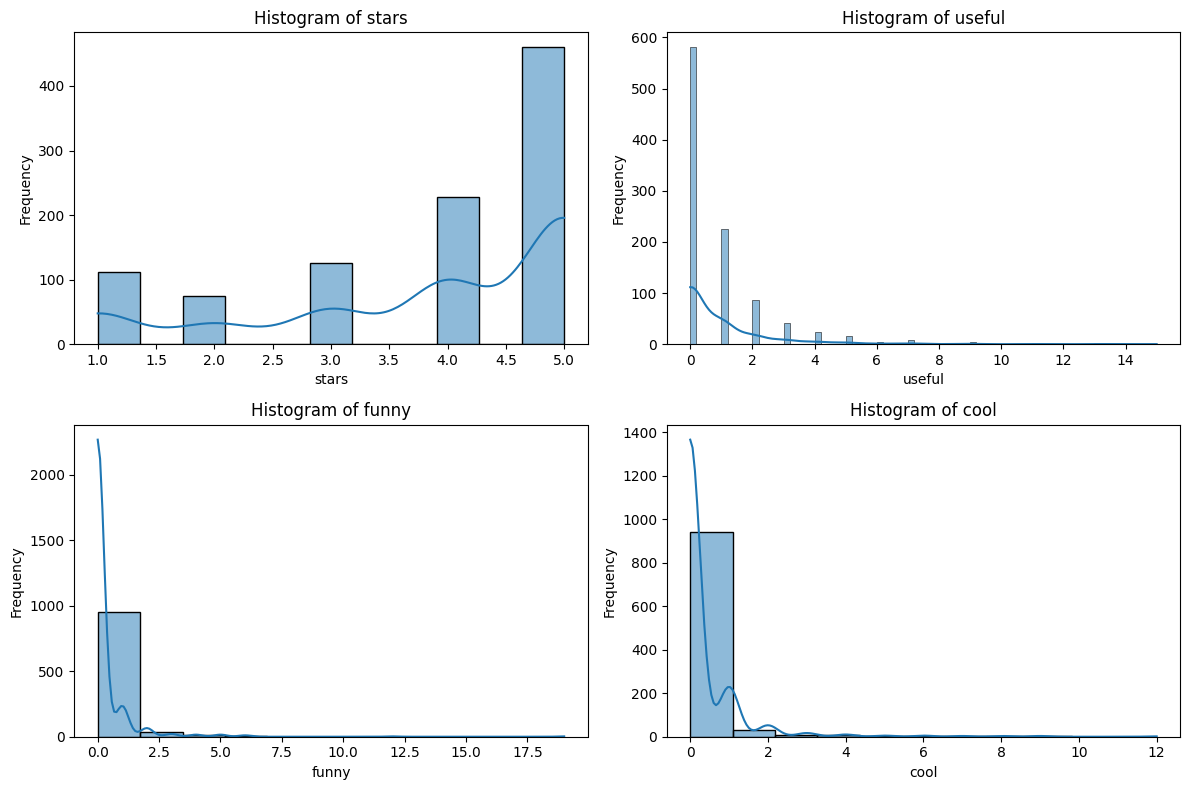

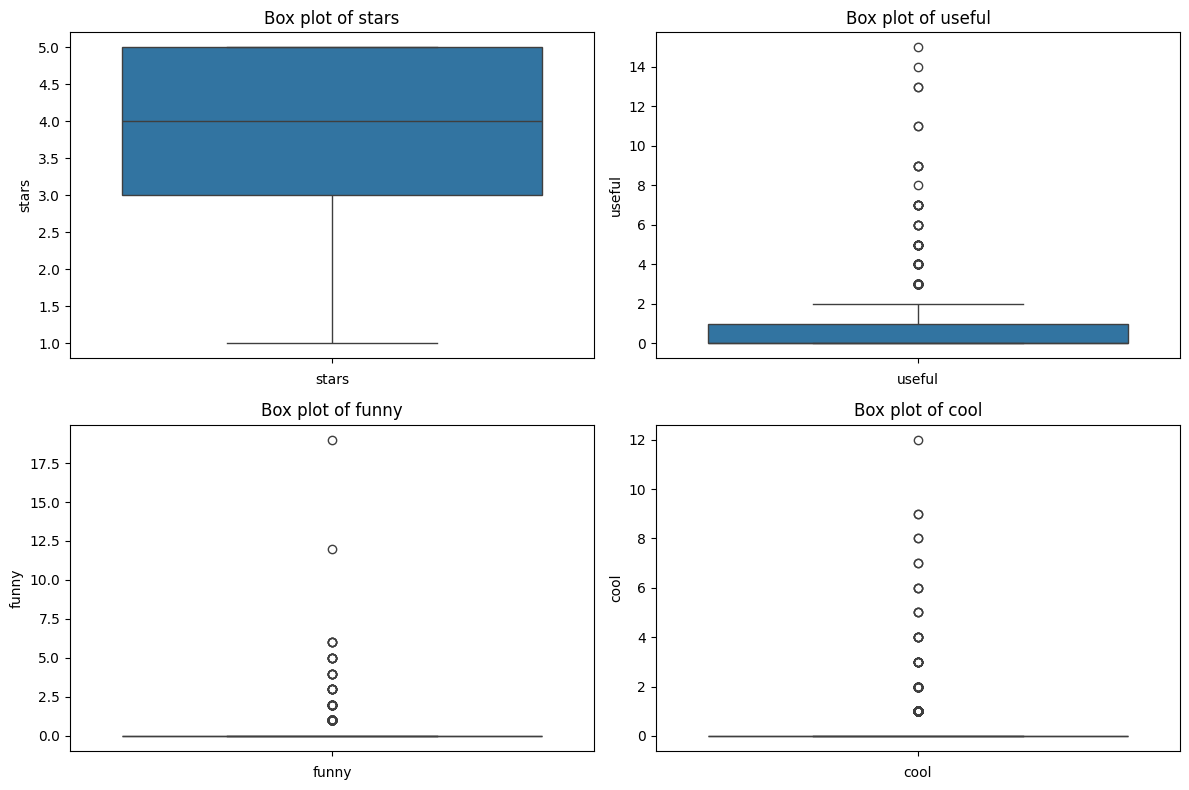

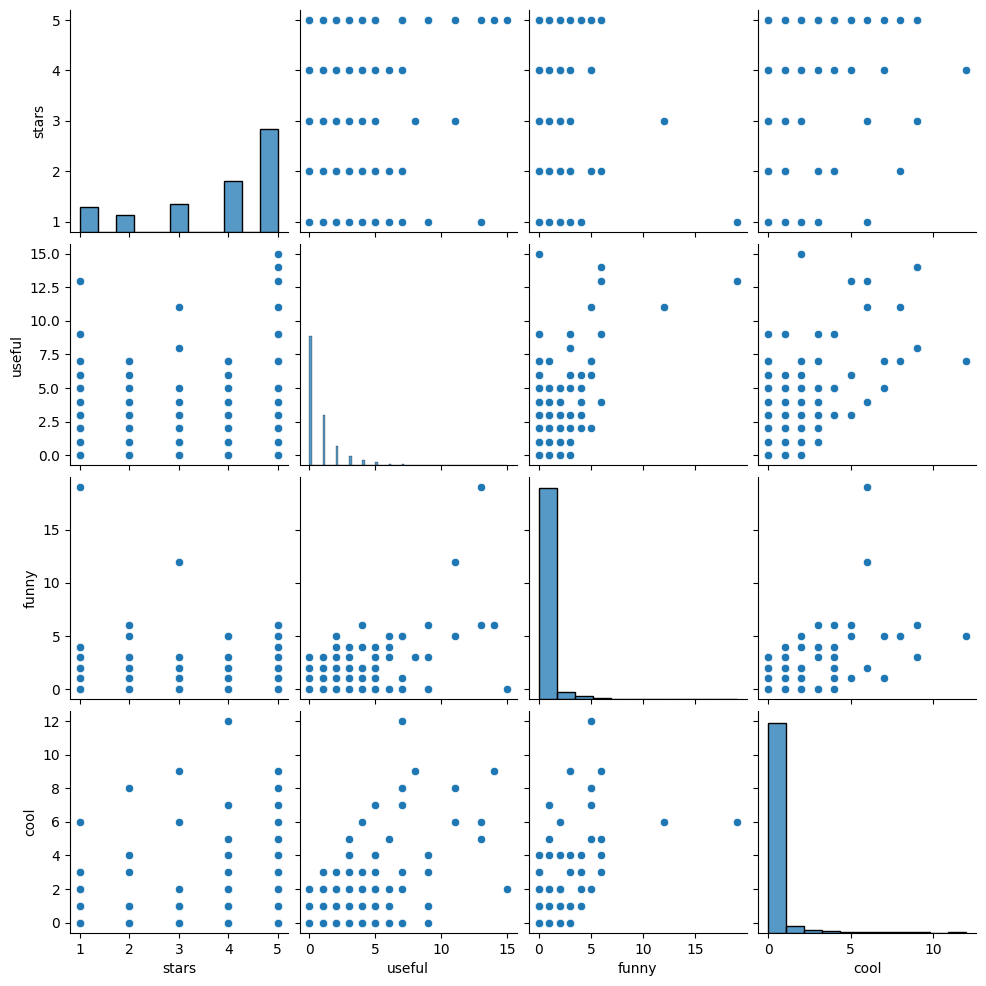

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the numerical features
print(df.describe())

# Plot histograms for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['stars', 'useful', 'funny', 'cool']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plot for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['stars', 'useful', 'funny', 'cool']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['stars', 'useful', 'funny', 'cool']])
plt.show()


In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Ryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Ryan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Sample text data
# Assuming your text column in the DataFrame is named 'text'
sample_data = df['text']

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Handle mentions, hashtags, and URLs
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+ |#[A-Za-z0-9]+', '', text)  # Remove mentions and hashtags
    
    return filtered_tokens, stemmed_tokens, lemmatized_tokens, text

# Apply preprocessing function to each text in the DataFrame
df['filtered_tokens'], df['stemmed_tokens'], df['lemmatized_tokens'], df['processed_text'] = zip(*df['text'].apply(preprocess_text))

# Display the DataFrame with preprocessed text
print(df.head())

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming your target label column is 'target_label'
X = df['processed_text']  # Use the preprocessed text column as features
y = df['stars']  # Use the target label column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can proceed with feature extraction using the split data
# Apply preprocessing function to each text in the training set
X_train_preprocessed = X_train.apply(preprocess_text)

# Apply preprocessing function to each text in the testing set
X_test_preprocessed = X_test.apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Word Embeddings (Word2Vec)
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(X_train, total_examples=len(X_train), epochs=10)
word2vec_vectorizer = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])
X_train_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models as pipeline objects
models = {
    # 'Naive Bayes': Pipeline([
    #     ('tfidf', TfidfVectorizer(max_features=5000)),
    #     ('nb', MultinomialNB())
    # ]),
    # 'Logistic Regression': Pipeline([
    #     ('tfidf', TfidfVectorizer(max_features=5000)),
    #     ('lr', LogisticRegression(max_iter=1000))
    # ])
     'Support Vector Machine': Pipeline([
         ('tfidf', TfidfVectorizer(max_features=5000)),
         ('svm', SVC(kernel='linear', probability=True))
     ])
}

# Define parameter grids for grid search
param_grids = {
    # 'Naive Bayes': {'tfidf__ngram_range': [(1, 1), (1, 2)], 'nb__alpha': [0.01, 0.1, 1.0]},
    # 'Logistic Regression': {'tfidf__ngram_range': [(1, 1), (1, 2)], 'lr__C': [0.1, 1.0, 10.0]},
     'Support Vector Machine': {'tfidf__ngram_range': [(1, 1), (1, 2)], 'svm__C': [0.1, 1.0, 10.0]}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate the best models
metrics = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_test, y_pred)
    }

# Print comparison of metrics for the best models of each type
print("Comparison of Metrics for Best Models:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value:.4f}")
